In [31]:
# Import necessary modules/libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [82]:
# Define path to save results
script_dir = os.path.dirname(os.path.realpath('__file__'))
results_dir = os.path.join(script_dir, 'Results/')
my_7a = "vec_7a.png"
my_7b = "vec_7b.png"
my_7c = "vec_7c.png"
geopot = "lat_vs_geopot"

# If no folder, create one
if not os.path.isdir(results_dir):
    os.makedirs(results_dir)

In [52]:
# Define function to plot 2D vector fields
def plot_2d_vector_field(X, Y, U, V, title, name):
    plt.figure(figsize=(6, 6))
    plt.quiver(X, Y, U, V)     #provides arrows
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid(True)
    plt.savefig(results_dir + name)
    plt.show()

In [66]:
# Create a meshgrid for x and y
x = np.linspace(-5, 5, 20)
y = np.linspace(-5, 5, 20)
X, Y = np.meshgrid(x, y)

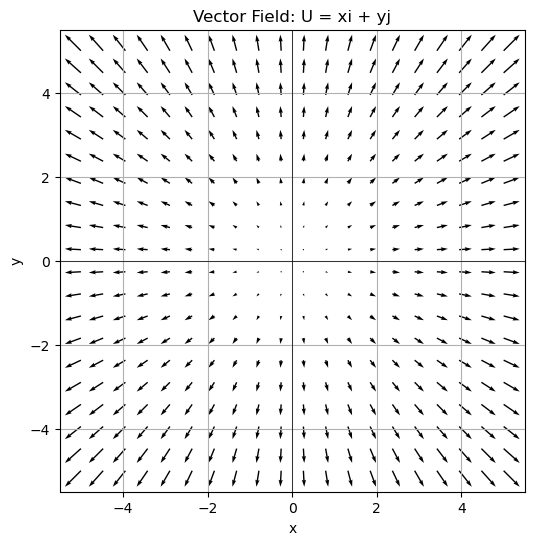

In [67]:
# Vector field a) U = xi + yj
U = 1*X
V = 1*Y
plot_2d_vector_field(X, Y, U, V, f'Vector Field: U = xi + yj', my_7a)

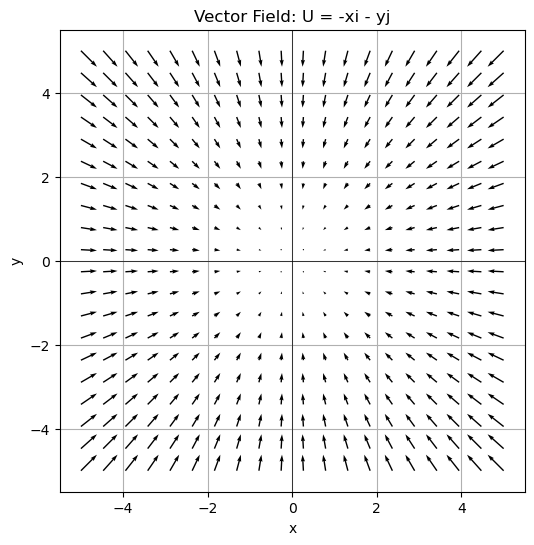

In [68]:
# Vector field b) U = -xi - yj
U = -X
V = -Y
plot_2d_vector_field(X, Y, U, V, 'Vector Field: U = -xi - yj', my_7b)

In [77]:
# Function to plot 3D vector field with corrections for better clarity
def plot_3d_vector_field_corrected(X, Y, Z, U, V, W, title, name):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    # Quiver plot with appropriate scaling
    ax.quiver(X, Y, Z, U, V, W, length=1, normalize=True)
    ax.set_xlim([-5, 5])
    ax.set_ylim([-5, 5])
    ax.set_zlim([-5, 5])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.title(title)
    plt.savefig(results_dir + name)
    plt.show()

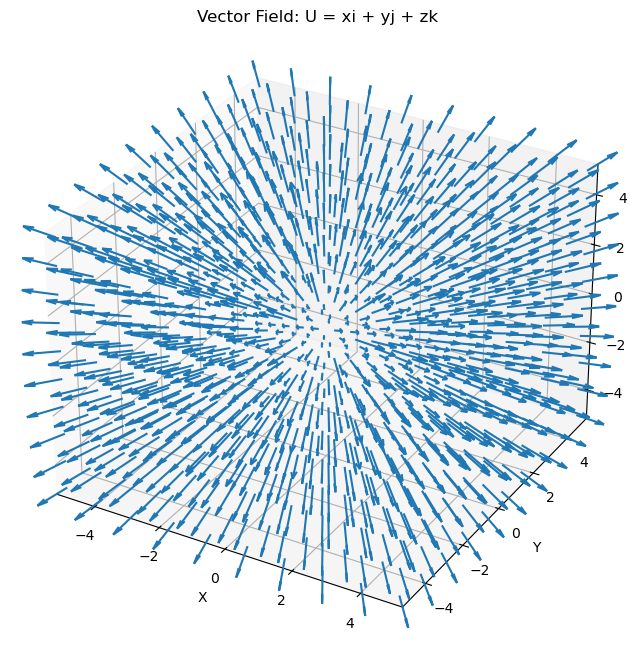

In [78]:
# Create a meshgrid for x, y, z for 3D vector field with fewer points for clarity
x_3d = np.linspace(-5, 5, 10)
y_3d = np.linspace(-5, 5, 10)
z_3d = np.linspace(-5, 5, 10)
X_3D, Y_3D, Z_3D = np.meshgrid(x_3d, y_3d, z_3d)

# Vector field c) U = xi + yj + zk using adjusted ranges
U_3D = X_3D
V_3D = Y_3D
W_3D = Z_3D

# Call the corrected plot function for a clear 3D visualization
plot_3d_vector_field_corrected(X_3D, Y_3D, Z_3D, U_3D, V_3D, W_3D, 'Vector Field: U = xi + yj + zk', my_7c)

In [79]:
# Latitude Vs Geopotential Height

In [86]:
# Define a function to convert degree to radians
def degrees_to_radians(degrees):
    """Convert an array of degrees to radians."""
    return np.deg2rad(degrees)

In [87]:
# Define a function to compute polynimial fit
def fit_polynomial(x, y, degree):
    """Fit a polynomial of specified degree to the data."""
    coefficients = np.polyfit(x, y, degree)
    polynomial = np.poly1d(coefficients)
    return polynomial, coefficients

In [97]:
# Define a function to create plot
def create_plot(x, y, polynomial, x_fine, title, xlabel, ylabel, name, reference_height):
    """Create and save a plot with the original data and fitted polynomial."""
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, 'o', label='Original Data')
    plt.plot(x_fine, polynomial(x_fine), '-', label='Fitted Curve')
    plt.axhline(y=reference_height, color='r', linestyle='--', label=f'Reference Height: {reference_height} m')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)

    # Display polynomial equation on the plot
    eq_text = "Polynomial: " + " + ".join(f"{coef:.2f}x^{len(polynomial.c)-i-1}" for i, coef in enumerate(polynomial.c))
    plt.figtext(0.5, 0.01, eq_text, wrap=True, horizontalalignment='center', fontsize=10)

    # Save the plot in a file
    plt.savefig(results_dir + name)
    plt.show()

In [98]:
# Data for latitude in degrees and geopotential height
latitude_degrees = np.array([
    0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5, 25, 27.5, 30,
    32.5, 35, 37.5, 40, 42.5, 45, 47.5, 50, 52.5, 55, 57.5, 60,
    62.5, 65, 67.5, 70, 72.5, 75, 77.5, 80, 82.5, 85, 87.5, 90
])

geopotential_height = np.array([
    1501.26, 1502.64, 1504.71, 1507.36, 1511.45, 1517.59, 1524.53, 1530.16, 1530.35, 1531.47,
    1532.72, 1524.37, 1516.15, 1507.55, 1494.4, 1469.93, 1449.33, 1418.74, 1419.16, 1414.57,
    1395.18, 1379.64, 1374.34, 1363.34, 1352.8, 1343.98, 1333.32, 1323.48, 1313.81, 1306.04,
    1301.88, 1301.64, 1303.54, 1312.22, 1314.84, 1324.06, 1336
])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

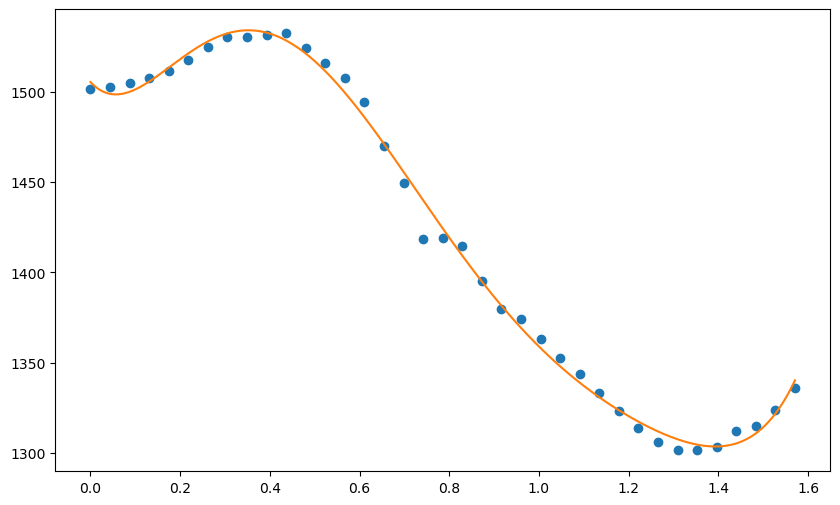

In [100]:
# Convert latitude to radians
latitude_radians = degrees_to_radians(latitude_degrees)

# Fit a polynomial of degree 6
polynomial, coefficients = fit_polynomial(latitude_radians, geopotential_height, 6)

# Generate a range of latitude values in radians for plotting
latitudes_fine_radians = np.linspace(min(latitude_radians), max(latitude_radians), 400)

# Create and save the plot
create_plot(
    latitude_radians, geopotential_height, polynomial, latitudes_fine_radians,
    'Geopotential Height vs Latitude (Radians)', 'Latitude (Radians)', 'Geopotential Height (m)',
    geopot, reference_height='1405.46' + '850 '
)